In [2]:
# 导入相关库
from sklearn.ensemble import RandomForestRegressor  # 导入随机森林回归器
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
from sklearn.model_selection import KFold, cross_val_score, train_test_split as TTS # 导入交叉验证、交叉验证评分及数据集划分
from sklearn.metrics import mean_squared_error  # 导入均方误差计算的方法
import xgboost as xgb
from sklearn.metrics import accuracy_score

import pandas as pd  # 导入处理数据的pandas库
import numpy as np  # 导入数值计算库Numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
from time import time  # 导入时间模块中的time函数
import datetime  # 导入日期时间模块

#读取文件
file_path = "D:\data\heart+disease\processed.cleveland.data"

# 替换'MissingValue'为NaN
data.replace('?', np.nan, inplace=True)
# 转换数据类型
data = data.astype(float)


# 设置特征和标签
X = data.iloc[:, :13]  # 前13列特征
y = data.iloc[:, 13]   # 第14列标签


#随机分割训练数据集和测试数据集
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.4, random_state=42)

# 转换为DMatrix，XGBoost的专用数据结构
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)


param = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5 ,
    'eta': 0.32,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.6,
    'colsample_bytree': 0.3,
    'gamma': 0,
    'lambda': 2.2,
    'alpha': 3.3,
    'eval_metric': 'logloss',
    'seed': 42
}

num_round = 85
bst = xgb.train(param, dtrain, num_round)


# 预测
Tain_preds = bst.predict(dtrain)
Test_preds = bst.predict(dtest)

# 计算准确率
train_accuracy = accuracy_score(y_train, Tain_preds)
print("Train data accuracy: {:.2f}%".format(train_accuracy * 100))
test_accuracy = accuracy_score(y_test, Test_preds)
print("Test data Accuracy: {:.2f}%".format(test_accuracy * 100))

Train data accuracy: 75.14%
Test data Accuracy: 61.16%


Test size: 0.10 | Train Accuracy: 0.7417 | Test Accuracy: 0.5484
Test size: 0.15 | Train Accuracy: 0.7344 | Test Accuracy: 0.5435
Test size: 0.20 | Train Accuracy: 0.7593 | Test Accuracy: 0.5246
Test size: 0.25 | Train Accuracy: 0.7699 | Test Accuracy: 0.5132
Test size: 0.30 | Train Accuracy: 0.7583 | Test Accuracy: 0.5604
Test size: 0.35 | Train Accuracy: 0.7449 | Test Accuracy: 0.5755
Test size: 0.40 | Train Accuracy: 0.7514 | Test Accuracy: 0.6116
Test size: 0.45 | Train Accuracy: 0.7470 | Test Accuracy: 0.5588


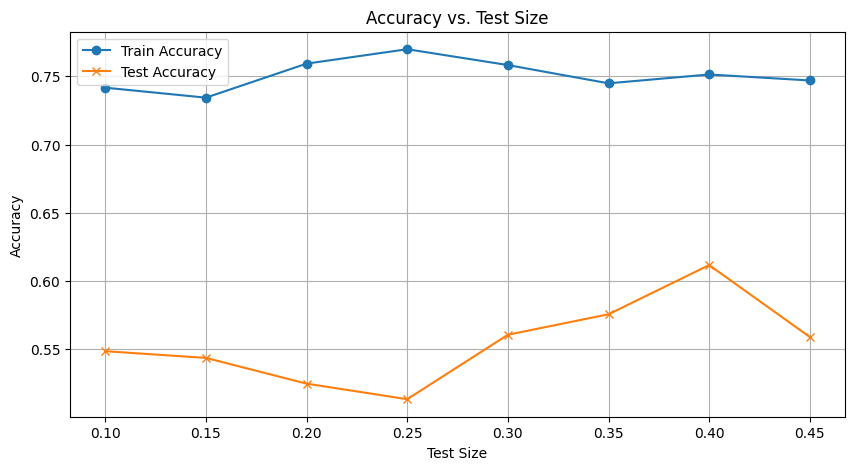

In [4]:
# 导入相关库
from sklearn.ensemble import RandomForestRegressor  # 导入随机森林回归器
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
from sklearn.model_selection import KFold, cross_val_score, train_test_split as TTS # 导入交叉验证、交叉验证评分及数据集划分
from sklearn.metrics import mean_squared_error, accuracy_score  # 导入均方误差计算的方法及准确度计算方法
import xgboost as xgb

import pandas as pd  # 导入处理数据的pandas库
import numpy as np  # 导入数值计算库Numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
from time import time  # 导入时间模块中的time函数
import datetime  # 导入日期时间模块


# 读取文件
file_path = "D:\data\heart+disease\processed.cleveland.data"
data = pd.read_csv(file_path, delimiter=',')

# 替换'MissingValue'为NaN
data.replace('?', np.nan, inplace=True)
# 转换数据类型
data = data.astype(float)

# 设置特征和标签
X = data.iloc[:, :13]  # 前13列特征
y = data.iloc[:, 13]   # 第14列标签

# 定义XGBoost参数
param = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5 ,
    'eta': 0.32,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.6,
    'colsample_bytree': 0.3,
    'gamma': 0,
    'lambda': 2.2,
    'alpha': 3.3,
    'eval_metric': 'logloss',
    'seed': 42
}

num_round = 85

# 测试不同的test_size
test_sizes = np.arange(0.1, 0.6, 0.01)
train_accuracies = []
test_accuracies = []

for test_size in test_sizes:
    # 随机分割训练数据集和测试数据集
    X_train, X_test, y_train, y_test = TTS(X, y, test_size=test_size, random_state=42)

    # 转换为DMatrix，XGBoost的专用数据结构
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
    dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

    # 训练模型
    bst = xgb.train(param, dtrain, num_round)
    
    # 预测
    y_train_pred = bst.predict(dtrain)
    y_test_pred = bst.predict(dtest)
    
    # 计算准确度
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 输出结果
for i, test_size in enumerate(test_sizes):
    print(f'Test size: {test_size:.2f} | Train Accuracy: {train_accuracies[i]:.4f} | Test Accuracy: {test_accuracies[i]:.4f}')

# 绘制训练准确度和测试准确度随test_size变化的图像
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_sizes, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Size')
plt.legend()
plt.grid(True)
plt.show()